<a href="https://colab.research.google.com/github/chequanghuy/CS114.K21/blob/master/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.4
matplotlib: 3.2.1
pandas: 1.0.3
sklearn: 0.22.2.post1


In [ ]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Load dataset
df = read_csv("Dataset.csv")

In [ ]:
df

,class,age,gender,survived
0,1st,adult,male,yes
1,3rd,adult,male,no
2,crew,adult,male,no
3,crew,adult,male,yes
4,2nd,adult,male,no
...,...,...,...,...
2196,3rd,adult,male,no
2197,3rd,adult,male,no
2198,crew,adult,male,no
2199,2nd,adult,male,no


In [ ]:
#Data Processing
df = df.replace('male',1)
df = df.replace('female',0)

df = df.replace('1st',1)
df = df.replace('2nd',2)
df = df.replace('3rd',3)
df = df.replace('crew',4)

df = df.replace('adult',1)
df = df.replace('child',0)

df = df.replace('yes',1)
df = df.replace('no',0)

In [ ]:
df.head()

,class,age,gender,survived
0,1,1,1,1
1,3,1,1,0
2,4,1,1,0
3,4,1,1,1
4,2,1,1,0


In [ ]:
# descriptions
print(df.describe())

             class          age       gender     survived
count  2201.000000  2201.000000  2201.000000  2201.000000
mean      2.977283     0.950477     0.786461     0.323035
std       1.059345     0.217006     0.409898     0.467742
min       1.000000     0.000000     0.000000     0.000000
25%       2.000000     1.000000     1.000000     0.000000
50%       3.000000     1.000000     1.000000     0.000000
75%       4.000000     1.000000     1.000000     1.000000
max       4.000000     1.000000     1.000000     1.000000


In [ ]:
print(df.groupby('class').size())

class
1    325
2    285
3    706
4    885
dtype: int64


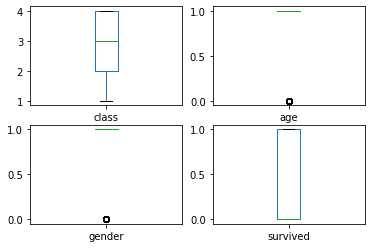

In [ ]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

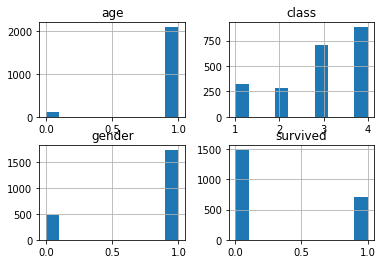

In [ ]:
# histograms
df.hist()
pyplot.show()

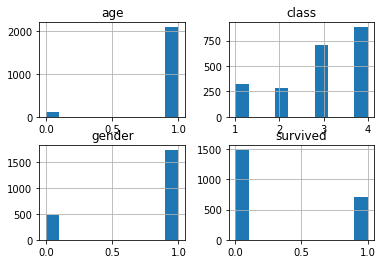

In [ ]:
# histograms
df.hist()
pyplot.show()

In [ ]:
# Split-out validation dataset
array = df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.774675 (0.029479)
LDA: 0.774675 (0.029479)
KNN: 0.779221 (0.023232)
CART: 0.783117 (0.024157)
NB: 0.771429 (0.031785)
SVM: 0.779221 (0.030457)


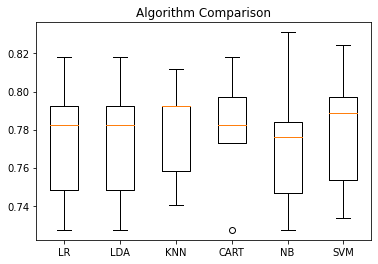

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Load dataset
df = read_csv("Dataset.csv")

#Data Processing 
df = df.replace('male',1)
df = df.replace('female',0)

df = df.replace('1st',1)
df = df.replace('2nd',2)
df = df.replace('3rd',3)
df = df.replace('crew',4)

df = df.replace('adult',1)
df = df.replace('child',0)

df = df.replace('yes',1)
df = df.replace('no',0)

# Split-out validation dataset
array = df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
# Make predictions on validation df
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7866868381240545
[[408  39]
 [102 112]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       447
           1       0.74      0.52      0.61       214

    accuracy                           0.79       661
   macro avg       0.77      0.72      0.73       661
weighted avg       0.78      0.79      0.78       661

